### Esta notebook contiene en su primera parte un método para graficar 
### archivos del equipo utilizado para medir Raman (Horiba)
### La segunda parte intenta condensar estos métodos en una clase o -class- para encapsular las funcionalidades

***

## Primera versión del código...

***

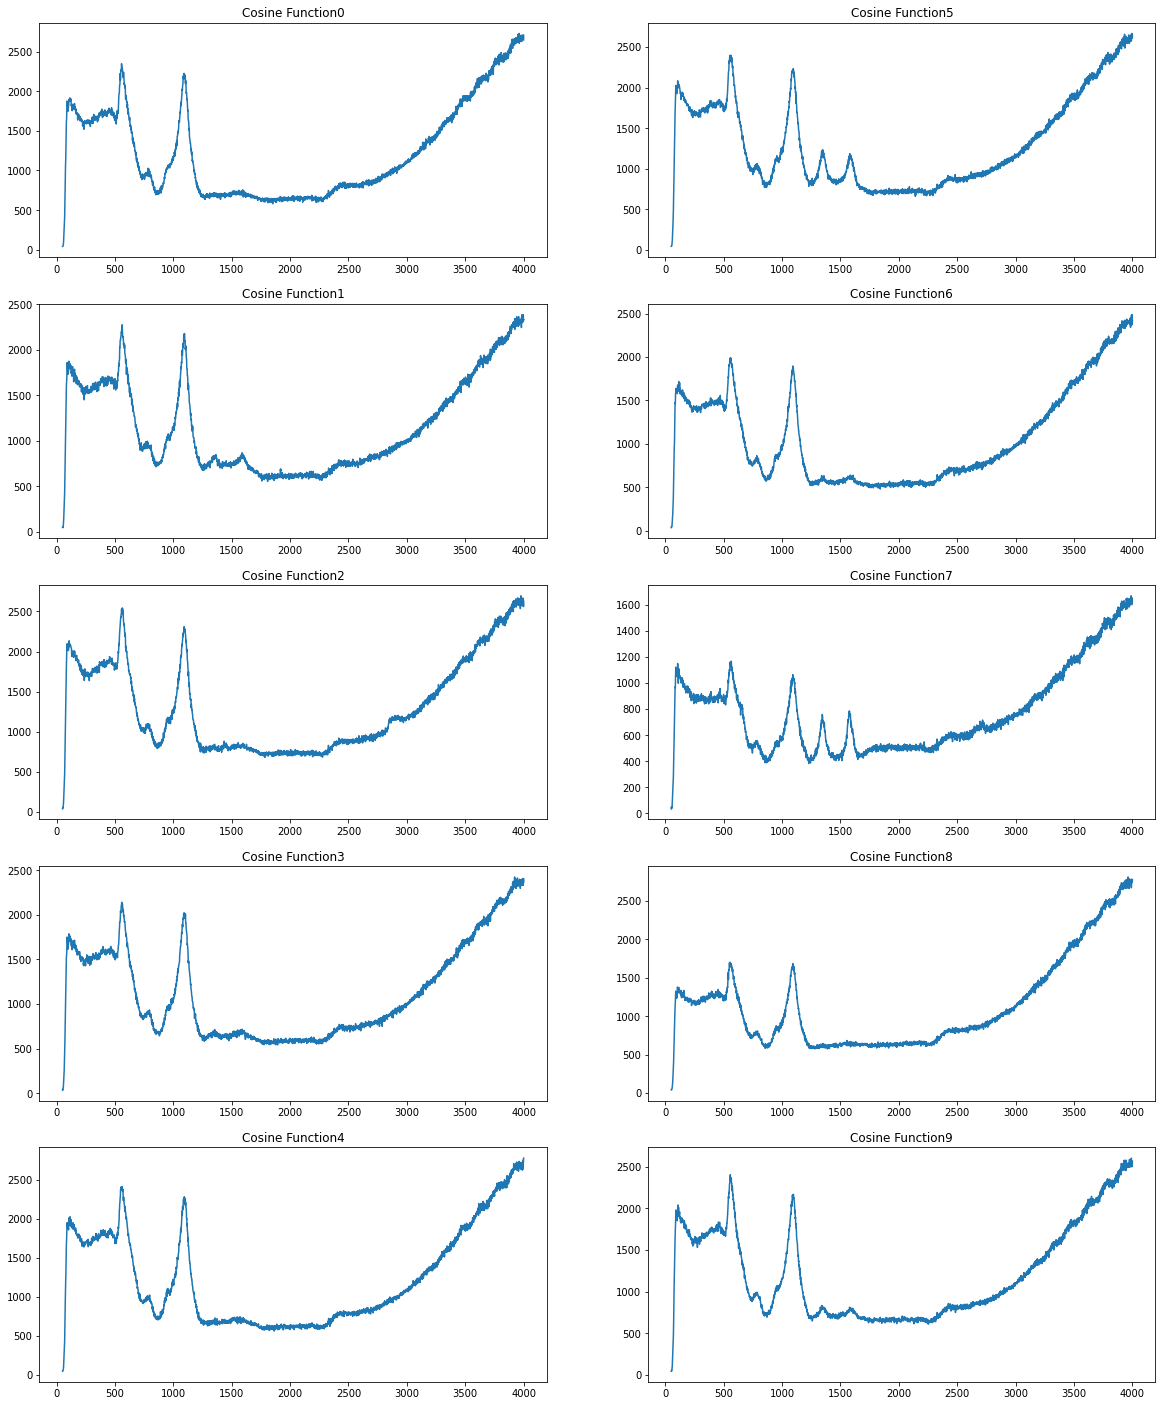

In [9]:
# Paqueteria utilizada
# Matplotlib: Para graficar
# os: Obtener el path o camino al directorio de trabajo en curso
# cwd = current working directory

import matplotlib.pyplot as plt
import os

# Current working directory
cwd   = os.getcwd()
# Subcarpeta de trabajo
folder= '/datosramana'
# Archivos en el directorio
files = os.listdir( cwd + folder)

files = [ cwd + folder + '/' + f for f in files]

conts = []

for file in files:
    with open(file, 'r', encoding = 'unicode_escape') as tempfile:
        conts.append(tempfile.read())

specs = []

for cont in conts:
    values = cont.split('#Acquired')[1].split('\n')[1:-1]
    spx=[]
    spy=[]
    for string_values in values:
        try:
            x = float(string_values.split('\t')[0])
            y = float(string_values.split('\t')[1])
        except:
            pass
        spx.append(x)
        spy.append(y)
    specs.append((spx,spy))

figure, axis = plt.subplots(5, 2, figsize=(20,25))

i=0

for col in range(0,2):
    for row in range(0,5):
            axis[row, col].plot(specs[i][0], specs[i][1])
            axis[row, col].set_title("Cosine Function"+str(i))

            # Save just the portion _inside_ the second axis's boundaries
            extent = axis[row, col].get_window_extent().transformed(figure.dpi_scale_trans.inverted())
            figure.savefig('ax2_figure.png', bbox_inches=extent)

            # Pad the saved area by 10% in the x-direction and 20% in the y-direction
            figure.savefig('ax2_figure_expanded.png', bbox_inches=extent.expanded(1.1, 1.2))

            i+=1

***

## Código encapsulado...

***

In [43]:
import matplotlib.pyplot as plt
import os

class RamanSpectraGroup(object):
    
    def __init__(self, folder):
        self.folder = '/' + folder
        self.path   = os.getcwd()
        self.conts  = []
        self.files  = [ self.path + self.folder + '/' + f for f in os.listdir(self.path + self.folder)]
        self.getDetailedSpectra()

    def getDetailedSpectra(self):
        for file in self.files:
            with open(file, 'r', encoding = 'unicode_escape') as tempfile:
                content = tempfile.read()
                values = content.split('#Acquired')[1].split('\n')[1:-1]
                spx=[]
                spy=[]
                for string_values in values:
                    try:
                        x = float(string_values.split('\t')[0])
                        y = float(string_values.split('\t')[1])
                    except:
                        print('Ocurrio un error al hacer la lectura de los archivos')
                    spx.append(x)
                    spy.append(y)
                self.conts.append( ((spx,spy), file ) )
    
    def plotSpectra(self,rows,cols,savefile = False):
        figure, axis = plt.subplots(rows, cols, figsize=(20,25), tight_layout=True)
        i = 0
        for col in range(0,cols):
            for row in range(0,rows):
                    axis[row, col].plot(self.conts[i][0][0], self.conts[i][0][1])
                    axis[row, col].set_title(self.conts[i][1].split('/')[-1])
                    if savefile:
                        extent = axis[row, col].get_window_extent().transformed(figure.dpi_scale_trans.inverted())
                        figure.savefig( self.conts[i][1].split('/')[-1] + '.jpg', bbox_inches=extent, dpi = 250)
                    # Save just the portion _inside_ the second axis's boundaries
                    # extent = axis[row, col].get_window_extent().transformed(figure.dpi_scale_trans.inverted())
                    # figure.savefig('ax2_figure.png', bbox_inches=extent)
                    # # Pad the saved area by 10% in the x-direction and 20% in the y-direction
                    # figure.savefig('ax2_figure_expanded.png', bbox_inches=extent.expanded(1.1, 1.2))
                    i+=1
            
            bbox_inches='tight'

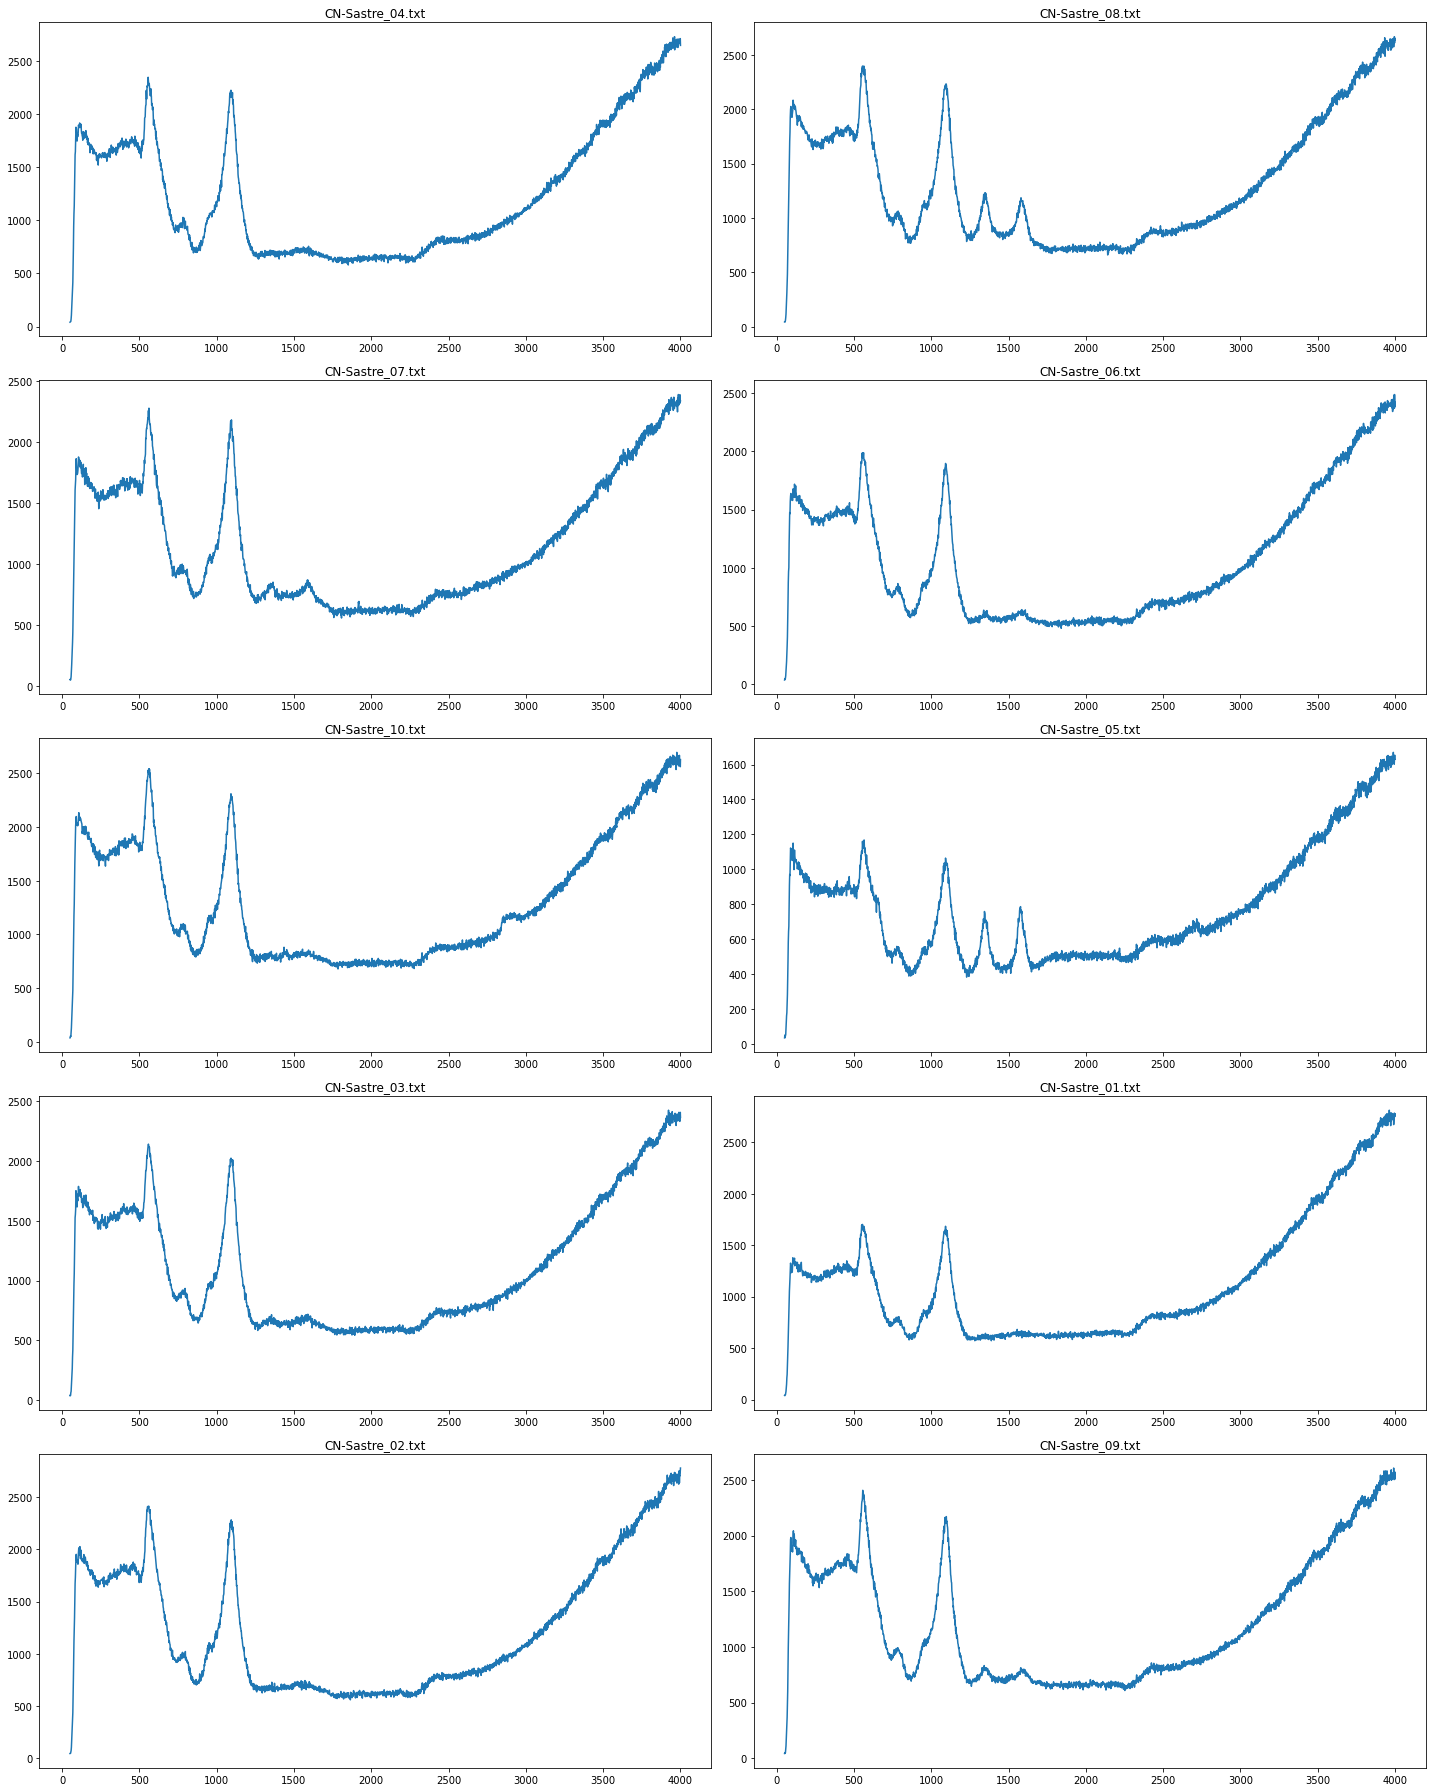

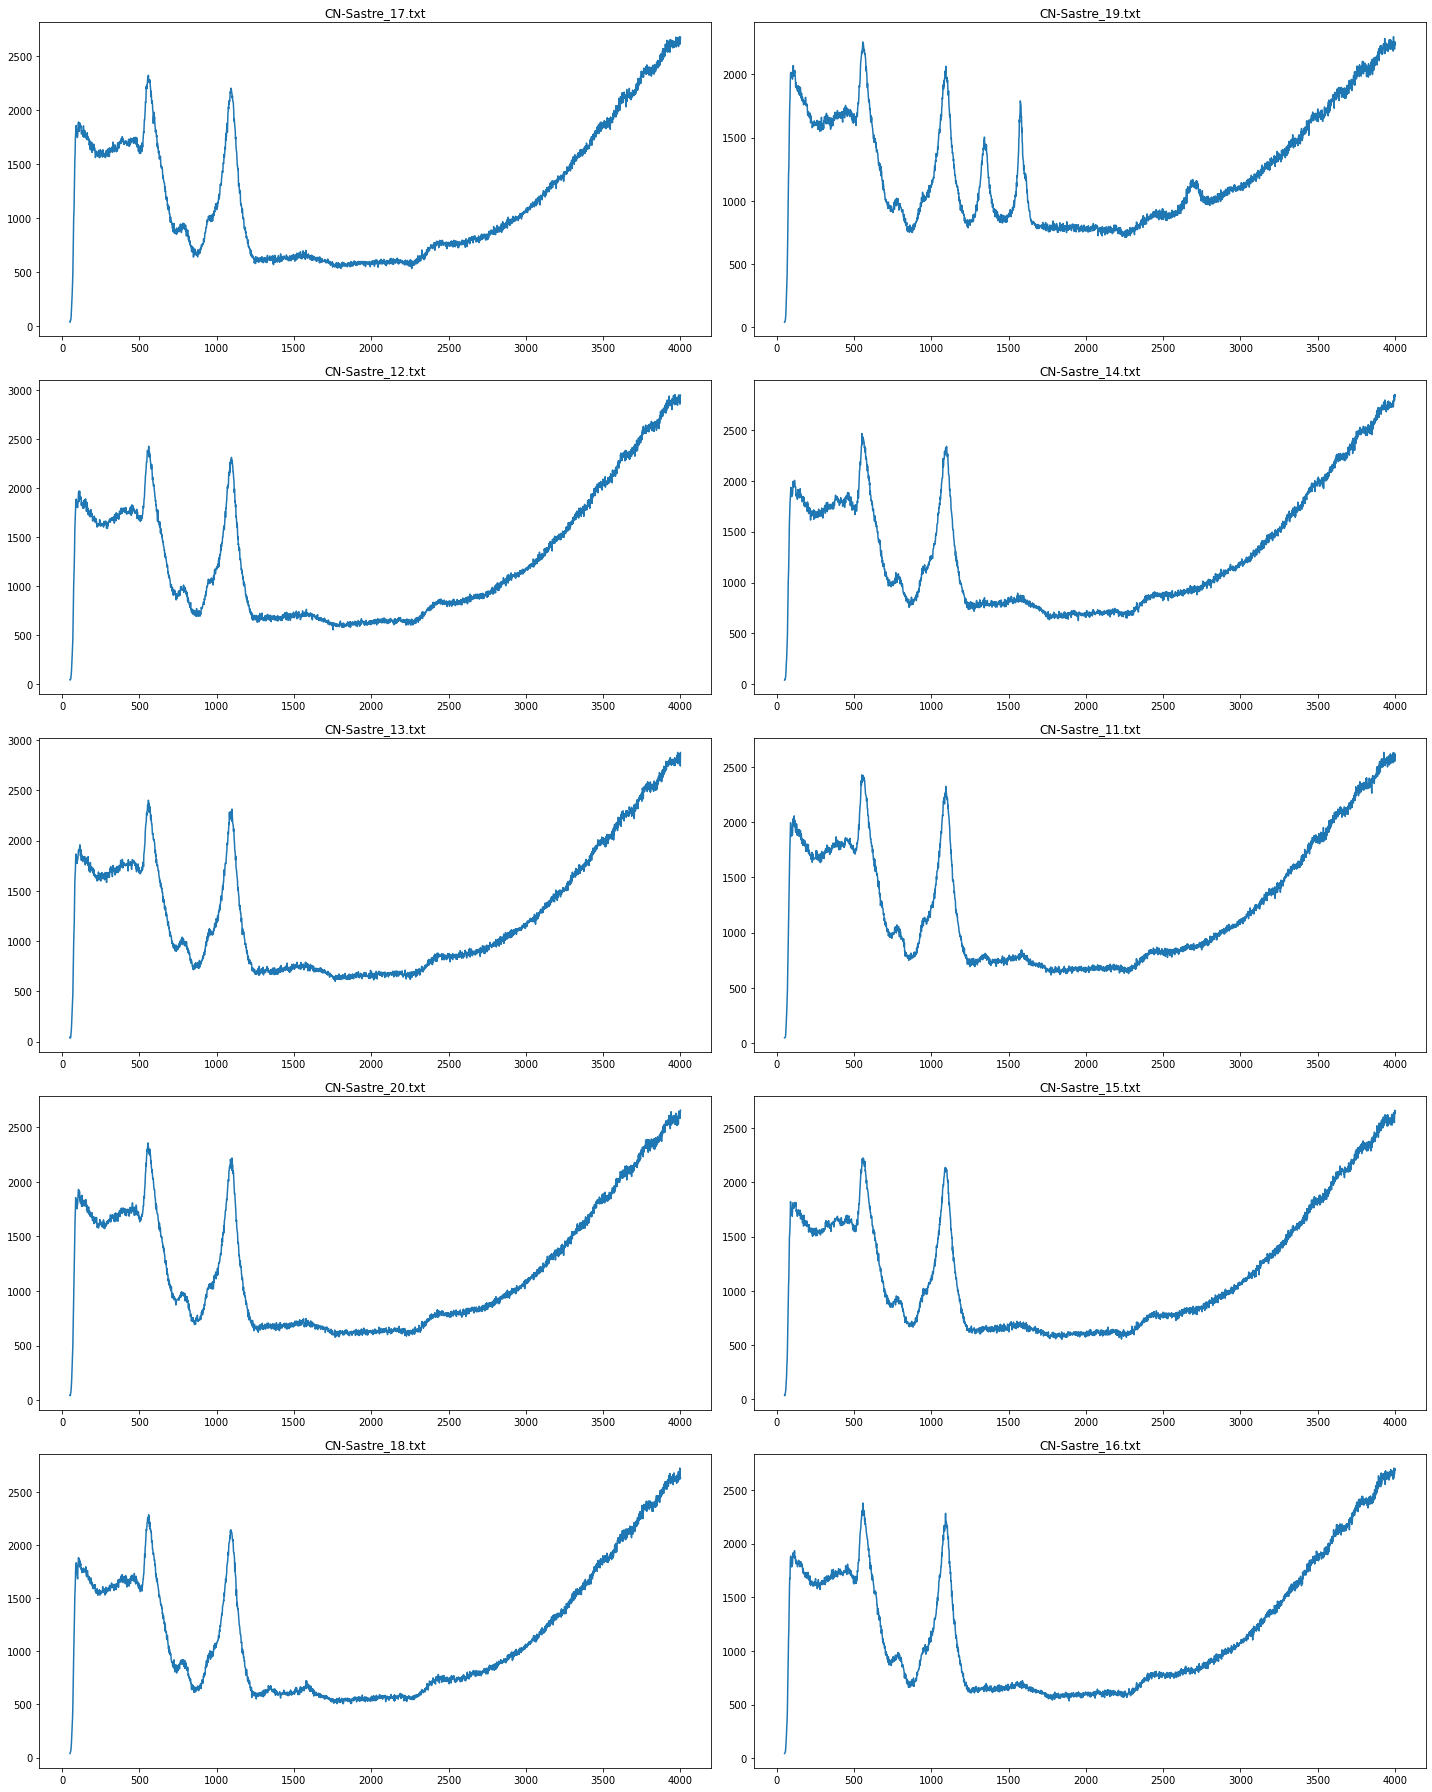

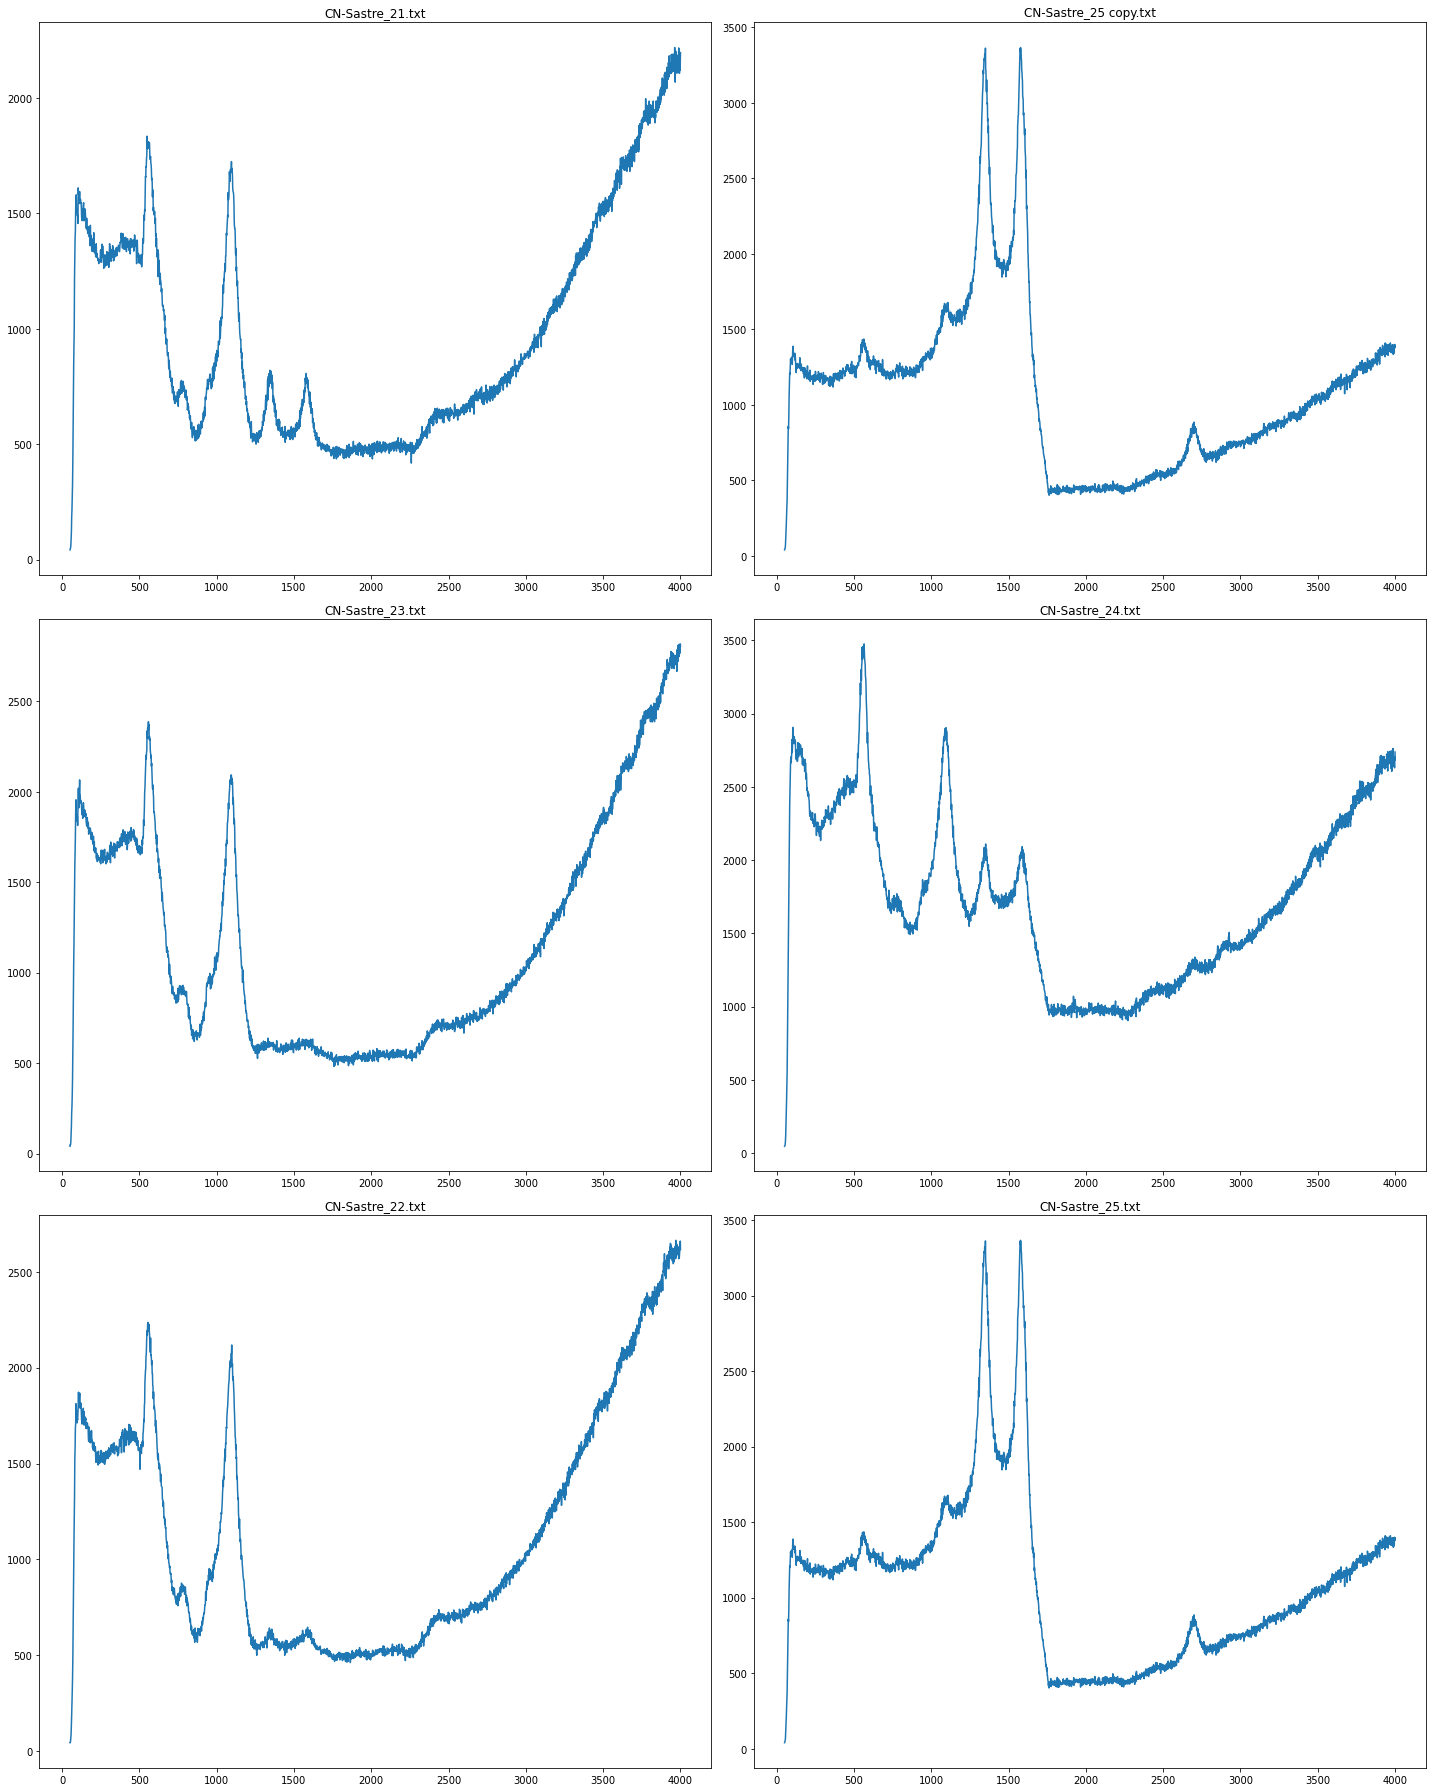

In [44]:
a = RamanSpectraGroup('datosramana')
a.plotSpectra(5,2)

b = RamanSpectraGroup('datosramanb')
b.plotSpectra(5,2)

c = RamanSpectraGroup('datosramanc')
c.plotSpectra(3,2, savefile=True)